<a href="https://colab.research.google.com/github/Nachiaa/Nachiaa/blob/main/6020_Ofori_Kuragu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install/Import Libraries

!pip install pycaret



In [ ]:
import pandas as pd
from pycaret.classification import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, classification_report




100%|██████████| 111k/111k [00:00<00:00, 49.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ujjwal5105/heart-attack-prediction/versions/1


In [ ]:
# Load dataset
heart_df = pd.read_csv('heart_attack.csv')

# Preview
heart_df.head()

# Preview
heart_df.head()

,Age,Gender,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar (> 120 mg/dL),Resting ECG Results,Max Heart Rate Achieved,Exercise-Induced Angina,Old Peak (ST Depression),...,Thalassemia,Smoking History,Obesity (BMI > 30),Hypertension History,Diabetes History,Alcohol Consumption,Physical Activity,Stress Levels,Family History of Heart Disease,Heart Attack Risk
0,69,0,4,109,487,1,1,122,1,3.51,...,2,1,1,0,0,0,0,1,1,0
1,32,0,2,125,170,0,1,113,1,4.74,...,1,0,1,1,0,0,0,2,0,1
2,89,0,2,186,543,1,0,165,1,2.70,...,1,0,0,1,0,1,1,3,0,0
3,78,0,2,104,367,0,0,117,1,0.62,...,1,1,0,1,0,1,0,1,0,1
4,38,1,1,151,158,1,0,123,1,2.00,...,2,0,1,1,0,1,0,2,0,1


In [ ]:
heart_df.info()
heart_df.describe()
heart_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                7000 non-null   int64  
 1   Gender                             7000 non-null   int64  
 2   Chest Pain Type                    7000 non-null   int64  
 3   Resting Blood Pressure             7000 non-null   int64  
 4   Cholesterol                        7000 non-null   int64  
 5   Fasting Blood Sugar (> 120 mg/dL)  7000 non-null   int64  
 6   Resting ECG Results                7000 non-null   int64  
 7   Max Heart Rate Achieved            7000 non-null   int64  
 8   Exercise-Induced Angina            7000 non-null   int64  
 9   Old Peak (ST Depression)           7000 non-null   float64
 10  Slope of Peak Exercise ST Segment  7000 non-null   int64  
 11  Number of Major Vessels (0-3)      7000 non-null   int64

,0
Age,0
Gender,0
Chest Pain Type,0
Resting Blood Pressure,0
Cholesterol,0
Fasting Blood Sugar (> 120 mg/dL),0
Resting ECG Results,0
Max Heart Rate Achieved,0
Exercise-Induced Angina,0
Old Peak (ST Depression),0


In [ ]:
#checking for imbalanse
heart_df['Heart Attack Risk'].value_counts(normalize=True)


,proportion
Heart Attack Risk,
1,0.500429
0,0.499571


In [ ]:
#Duplicates
heart_df.duplicated().sum()


0

In [ ]:
#checking categorical Values
categorical_cols = ['Chest Pain Type', 'Resting ECG Results', 'Slope of Peak Exercise ST Segment', 'Thalassemia', 'Stress Levels']
for col in categorical_cols:
    print(f"\n{col} value counts:\n", heart_df[col].value_counts())



Chest Pain Type value counts:
 Chest Pain Type
4    1782
2    1769
1    1729
3    1720
Name: count, dtype: int64

Resting ECG Results value counts:
 Resting ECG Results
0    3573
1    3427
Name: count, dtype: int64

Slope of Peak Exercise ST Segment value counts:
 Slope of Peak Exercise ST Segment
1    2394
2    2343
3    2263
Name: count, dtype: int64

Thalassemia value counts:
 Thalassemia
1    2365
2    2362
3    2273
Name: count, dtype: int64

Stress Levels value counts:
 Stress Levels
2    2374
3    2349
1    2277
Name: count, dtype: int64


In [ ]:
# Convert to object dtype for categorical columns
categorical_cols = [
    'Chest Pain Type',
    'Resting ECG Results',
    'Slope of Peak Exercise ST Segment',
    'Thalassemia',
    'Stress Levels'
]

heart_df[categorical_cols] = heart_df[categorical_cols].astype('object')

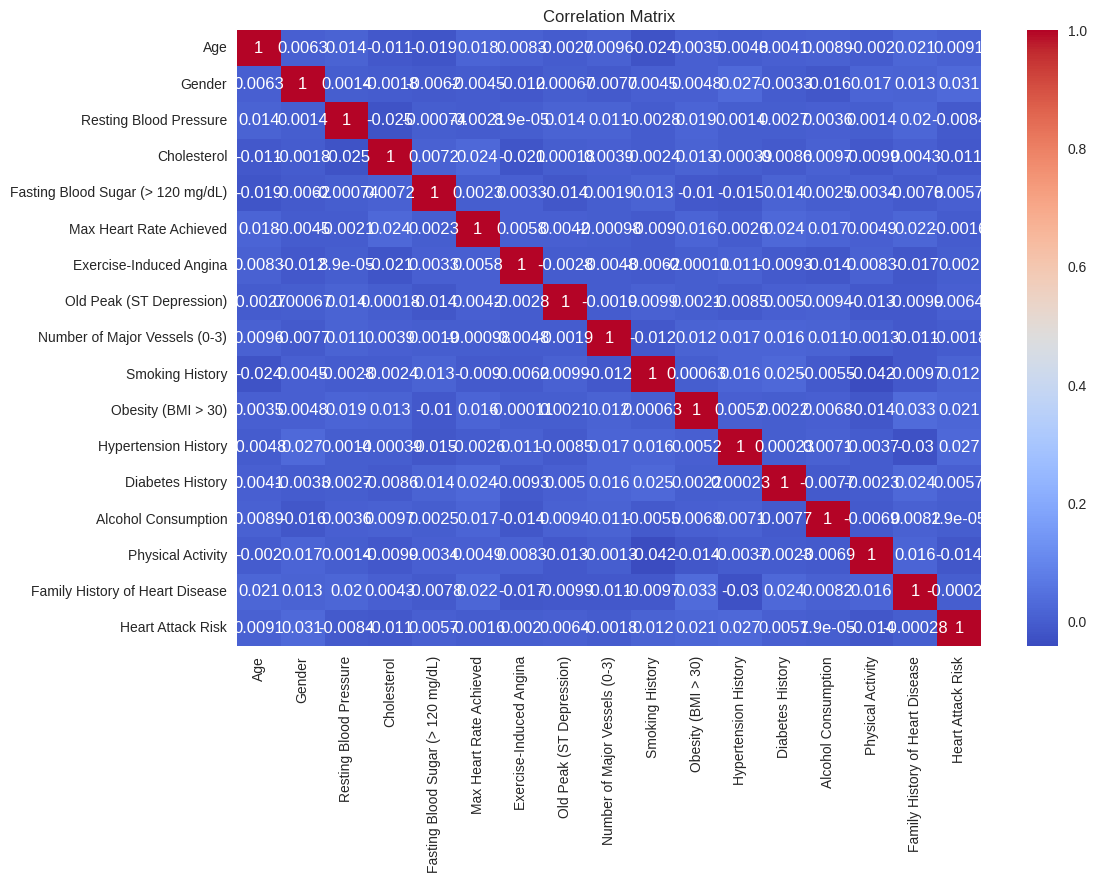

In [ ]:
#correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(heart_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# Setup with cleaned data
clf = setup(data=heart_df, target='Heart Attack Risk', session_id=123)

,Description,Value
0,Session id,123
1,Target,Heart Attack Risk
2,Target type,Binary
3,Original data shape,"(7000, 22)"
4,Transformed data shape,"(7000, 22)"
5,Transformed train set shape,"(4900, 22)"
6,Transformed test set shape,"(2100, 22)"
7,Numeric features,21
8,Preprocess,True
9,Imputation type,simple


In [ ]:
#comparing models
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5245,0.5194,0.5241,0.5248,0.5242,0.0490,0.0490,0.0380
ridge,Ridge Classifier,0.5210,0.5224,0.5192,0.5213,0.5201,0.0420,0.0421,0.0410
lda,Linear Discriminant Analysis,0.5208,0.5224,0.5192,0.5211,0.5200,0.0416,0.0417,0.0460
lr,Logistic Regression,0.5206,0.5223,0.5179,0.5210,0.5193,0.0412,0.0413,1.5060
qda,Quadratic Discriminant Analysis,0.5192,0.5143,0.5232,0.5192,0.5209,0.0384,0.0384,0.0660
lightgbm,Light Gradient Boosting Machine,0.5169,0.5182,0.5142,0.5173,0.5156,0.0339,0.0339,0.6020
ada,Ada Boost Classifier,0.5163,0.5196,0.5122,0.5167,0.5142,0.0327,0.0327,0.3850
xgboost,Extreme Gradient Boosting,0.5153,0.5168,0.5208,0.5152,0.5176,0.0306,0.0307,0.3530
knn,K Neighbors Classifier,0.5114,0.5123,0.5241,0.5118,0.5175,0.0228,0.0228,0.0840
gbc,Gradient Boosting Classifier,0.5114,0.5237,0.5110,0.5111,0.5108,0.0229,0.0228,1.2000


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
#evealuating models
evaluate_model(best_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
#predictions
probs = best_model.predict_proba(heart_df.drop(columns='Heart Attack Risk'))[:,1]

# Add probabilities to predictions df
predictions = predict_model(best_model, data=heart_df)
predictions['Score'] = probs

#
predictions[['Heart Attack Risk', 'Score']].head()



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.5303,0.5388,0.5373,0.5303,0.5337,0.0606,0.0606


,Heart Attack Risk,Score
0,0,0.514322
1,1,0.468781
2,0,0.449879
3,1,0.533730
4,1,0.551861


In [ ]:
threshold = 0.4
predictions['adjusted_pred'] = predictions['Score'].apply(lambda x: 1 if x >= threshold else 0)


In [ ]:
#set threshold
threshold = 0.4
predictions['adjusted_pred'] = predictions['Score'].apply(lambda x: 1 if x >= threshold else 0)


In [ ]:
y_true = predictions['Heart Attack Risk']
y_pred = predictions['adjusted_pred']

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_true, y_pred))


Confusion Matrix:
 [[  24 3473]
 [  13 3490]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.01      0.01      3497
           1       0.50      1.00      0.67      3503

    accuracy                           0.50      7000
   macro avg       0.57      0.50      0.34      7000
weighted avg       0.57      0.50      0.34      7000



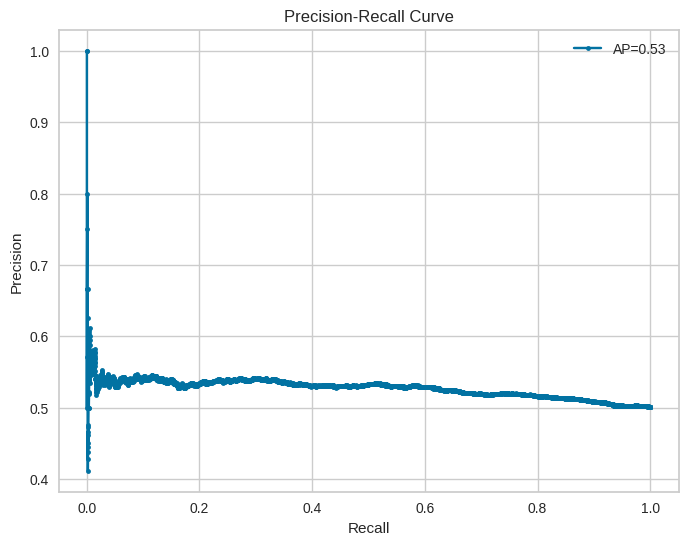

In [ ]:

y_true = predictions['Heart Attack Risk']
y_scores = predictions['Score']

precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
ap = average_precision_score(y_true, y_scores)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', label=f'AP={ap:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()
